Importing Libraries


In [257]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler

In [258]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Some functions


In [259]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [260]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

     # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [261]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

In [262]:
df_ang_vel = pd.read_csv("/content/drive/MyDrive/titra/angular_velocity.csv")

In [263]:
df_fly = pd.read_csv("/content/drive/MyDrive/titra/flight.csv")

In [264]:
df_gps = pd.read_csv("/content/drive/MyDrive/titra/gps.csv")

In [265]:
df_ang_vel["a"]=df_ang_vel["xyz[0]"]/df_ang_vel["xyz[1]"]

In [266]:
df_ang_vel["b"]=df_ang_vel["xyz[1]"]/df_ang_vel["xyz[0]"]

In [267]:
df_ang_vel=df_ang_vel[(df_ang_vel["a"]>1.3) | (df_ang_vel["b"]>1.3)]

In [268]:
check_df(df_ang_vel)

##################### Shape #####################
(5438, 8)
##################### Types #####################
flight_id      int64
time          object
xyz[0]       float64
xyz[1]       float64
xyz[2]       float64
type          object
a            float64
b            float64
dtype: object
##################### Head #####################
    flight_id                        time  xyz[0]  xyz[1]  xyz[2]  \
14         68  1970-01-01 00:00:00.367646   0.290   0.004  -0.182   
15         68  1970-01-01 00:00:00.367668   0.394   0.007  -0.189   
16         68  1970-01-01 00:00:00.367688   0.425   0.002  -0.196   
23         68  1970-01-01 00:00:00.367828   0.351   0.002  -0.084   
24         68  1970-01-01 00:00:00.367846   0.307   0.007  -0.068   

                          type       a     b  
14  vehicle_angular_velocity_0  73.082 0.014  
15  vehicle_angular_velocity_0  59.695 0.017  
16  vehicle_angular_velocity_0 215.725 0.005  
23  vehicle_angular_velocity_0 180.303 0.006  
24  vehic

change the type of timestamp column for plotting


In [269]:
df_ang_vel['time'] = pd.to_datetime(df_ang_vel['time'])

In [270]:
df_ang_vel['time']=df_ang_vel['time'].dt.strftime('%f')

In [271]:
df_ang_vel["time"]=df_ang_vel["time"].astype("int64")

In [272]:
df_ang_vel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5438 entries, 14 to 10800
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   flight_id  5438 non-null   int64  
 1   time       5438 non-null   int64  
 2   xyz[0]     5438 non-null   float64
 3   xyz[1]     5438 non-null   float64
 4   xyz[2]     5438 non-null   float64
 5   type       5438 non-null   object 
 6   a          5438 non-null   float64
 7   b          5438 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 382.4+ KB


In [273]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_ang_vel, cat_th=5, car_th=20)

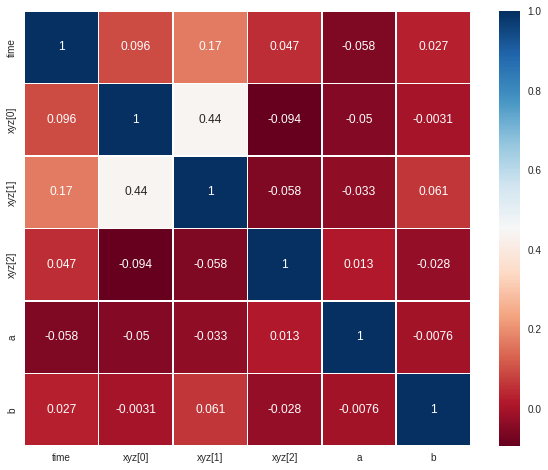

In [274]:
correlation_matrix(df_ang_vel, num_cols)

In [275]:
df_fly.head()

,flight_id,model_id,mission_id,flight_date,landing_date,landing_success,flight_success,flight_county,flight_province,flight_region,real_flight_time,mission_success
0,68,3,2,2022-09-08 11:01:00,2022-09-08 11:02:09.630734,t,t,Kahramankazan,Ankara,İç Anadolu Bölgesi,00:02:43,t
1,69,3,2,2022-09-08 13:42:00,2022-09-08 13:42:58.787339,t,t,Kahramankazan,Ankara,İç Anadolu Bölgesi,00:00:00,f


In [276]:
check_df(df_fly)

##################### Shape #####################
(2, 12)
##################### Types #####################
flight_id            int64
model_id             int64
mission_id           int64
flight_date         object
landing_date        object
landing_success     object
flight_success      object
flight_county       object
flight_province     object
flight_region       object
real_flight_time    object
mission_success     object
dtype: object
##################### Head #####################
   flight_id  model_id  mission_id          flight_date  \
0         68         3           2  2022-09-08 11:01:00   
1         69         3           2  2022-09-08 13:42:00   

                 landing_date landing_success flight_success  flight_county  \
0  2022-09-08 11:02:09.630734               t              t  Kahramankazan   
1  2022-09-08 13:42:58.787339               t              t  Kahramankazan   

  flight_province       flight_region real_flight_time mission_success  
0          Ankar

In [277]:
df_gps.head()

,flight_id,time,lat,lon,alt
0,68,1970-01-01 00:00:00.367295,40.138,32.549,0.094
1,68,1970-01-01 00:00:00.367455,40.138,32.549,0.094
2,68,1970-01-01 00:00:00.36785,40.138,32.549,0.094
3,68,1970-01-01 00:00:00.368248,40.138,32.549,0.094
4,68,1970-01-01 00:00:00.36885,40.138,32.549,0.094


In [278]:
check_df(df_gps)

##################### Shape #####################
(435, 5)
##################### Types #####################
flight_id      int64
time          object
lat          float64
lon          float64
alt          float64
dtype: object
##################### Head #####################
   flight_id                        time    lat    lon   alt
0         68  1970-01-01 00:00:00.367295 40.138 32.549 0.094
1         68  1970-01-01 00:00:00.367455 40.138 32.549 0.094
2         68   1970-01-01 00:00:00.36785 40.138 32.549 0.094
3         68  1970-01-01 00:00:00.368248 40.138 32.549 0.094
4         68   1970-01-01 00:00:00.36885 40.138 32.549 0.094
##################### Tail #####################
     flight_id                        time    lat    lon   alt
430         69  1970-01-01 00:00:00.102522 40.050 32.596 0.082
431         69  1970-01-01 00:00:00.103124 40.050 32.596 0.082
432         69  1970-01-01 00:00:00.103522 40.050 32.596 0.082
433         69  1970-01-01 00:00:00.104126 40.050 32.596

In [279]:
df_gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   flight_id  435 non-null    int64  
 1   time       435 non-null    object 
 2   lat        435 non-null    float64
 3   lon        435 non-null    float64
 4   alt        435 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 17.1+ KB


In [280]:
df_gps['time'] = pd.to_datetime(df_gps['time'])

In [281]:
df_gps['time']=df_gps['time'].dt.strftime('%f')

In [282]:
df_gps["time"]=df_gps["time"].astype("int64")

In [283]:
df_gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   flight_id  435 non-null    int64  
 1   time       435 non-null    int64  
 2   lat        435 non-null    float64
 3   lon        435 non-null    float64
 4   alt        435 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 17.1 KB


In [284]:
df_ang_vel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5438 entries, 14 to 10800
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   flight_id  5438 non-null   int64  
 1   time       5438 non-null   int64  
 2   xyz[0]     5438 non-null   float64
 3   xyz[1]     5438 non-null   float64
 4   xyz[2]     5438 non-null   float64
 5   type       5438 non-null   object 
 6   a          5438 non-null   float64
 7   b          5438 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 382.4+ KB


In [285]:
df = pd.merge(df_ang_vel,df_gps,on=["time","flight_id"],how='inner')

In [286]:
df.head()

,flight_id,time,xyz[0],xyz[1],xyz[2],type,a,b,lat,lon,alt
0,68,448868,-0.029,-0.008,0.075,vehicle_angular_velocity_0,3.469,0.288,40.139,32.544,0.113
1,68,449266,0.058,0.033,0.084,vehicle_angular_velocity_0,1.780,0.562,40.139,32.544,0.113
2,68,455871,0.061,0.259,0.120,vehicle_angular_velocity_0,0.234,4.270,40.140,32.544,0.114
3,68,471866,0.058,0.495,0.395,vehicle_angular_velocity_0,0.117,8.554,40.140,32.547,0.114
4,68,480266,0.169,0.030,0.159,vehicle_angular_velocity_0,5.694,0.176,40.139,32.549,0.114


In [287]:
check_df(df)

##################### Shape #####################
(9, 11)
##################### Types #####################
flight_id      int64
time           int64
xyz[0]       float64
xyz[1]       float64
xyz[2]       float64
type          object
a            float64
b            float64
lat          float64
lon          float64
alt          float64
dtype: object
##################### Head #####################
   flight_id    time  xyz[0]  xyz[1]  xyz[2]                        type  \
0         68  448868  -0.029  -0.008   0.075  vehicle_angular_velocity_0   
1         68  449266   0.058   0.033   0.084  vehicle_angular_velocity_0   
2         68  455871   0.061   0.259   0.120  vehicle_angular_velocity_0   
3         68  471866   0.058   0.495   0.395  vehicle_angular_velocity_0   
4         68  480266   0.169   0.030   0.159  vehicle_angular_velocity_0   

      a     b    lat    lon   alt  
0 3.469 0.288 40.139 32.544 0.113  
1 1.780 0.562 40.139 32.544 0.113  
2 0.234 4.270 40.140 32.544 0.114

#PCA

In [288]:
numcols=[i for i in df.columns if df[i].dtypes != "O" and "flight_id" not in i]

In [289]:
df=df[numcols]

In [290]:
df.isnull().sum()

time      0
xyz[0]    0
xyz[1]    0
xyz[2]    0
a         0
b         0
lat       0
lon       0
alt       0
dtype: int64

In [291]:
df = StandardScaler().fit_transform(df)

In [292]:
pca = PCA()

In [293]:
pca_fit = pca.fit_transform(df)

In [294]:
pca.explained_variance_ratio_

array([5.16787853e-01, 2.75645653e-01, 1.16137653e-01, 5.86507509e-02,
       1.51412965e-02, 9.93790986e-03, 6.32837009e-03, 1.37051449e-03,
       1.33655273e-33])

In [295]:
np.cumsum(pca.explained_variance_ratio_)

array([0.51678785, 0.79243351, 0.90857116, 0.96722191, 0.98236321,
       0.99230112, 0.99862949, 1.        , 1.        ])

# OPTIMUM BILESEN SAYISI

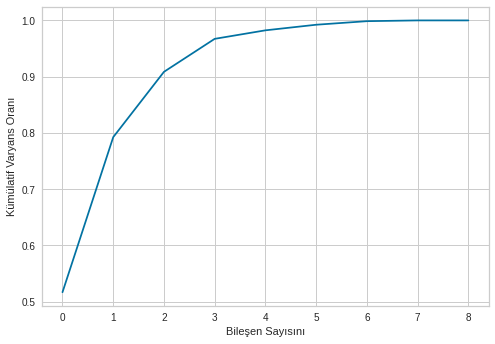

In [296]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show(block=True)

#FINAL PCA

In [297]:
pca = PCA(n_components=3)

In [298]:
pca_fit = pca.fit_transform(df)

In [299]:
pca.explained_variance_ratio_

array([0.51678785, 0.27564565, 0.11613765])

In [300]:
np.cumsum(pca.explained_variance_ratio_)

array([0.51678785, 0.79243351, 0.90857116])

DASHBOARD

In [301]:
df = pd.merge(df_ang_vel,df_gps,on=["time","flight_id"],how='inner')

In [302]:
df.head()

,flight_id,time,xyz[0],xyz[1],xyz[2],type,a,b,lat,lon,alt
0,68,448868,-0.029,-0.008,0.075,vehicle_angular_velocity_0,3.469,0.288,40.139,32.544,0.113
1,68,449266,0.058,0.033,0.084,vehicle_angular_velocity_0,1.780,0.562,40.139,32.544,0.113
2,68,455871,0.061,0.259,0.120,vehicle_angular_velocity_0,0.234,4.270,40.140,32.544,0.114
3,68,471866,0.058,0.495,0.395,vehicle_angular_velocity_0,0.117,8.554,40.140,32.547,0.114
4,68,480266,0.169,0.030,0.159,vehicle_angular_velocity_0,5.694,0.176,40.139,32.549,0.114


In [303]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [304]:
import time  # to simulate a real time data, time loop

import numpy as np  # np mean, np random
import pandas as pd  # read csv, df manipulation
import plotly.express as px  # interactive charts
import streamlit as st  # data web app development

In [305]:
st.set_page_config(
    page_title="Data Science Dashboard",
    page_icon="✅",
    layout="wide")

dashboard title

In [306]:
st.title("Data Science Dashboard")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

top-level filters

In [307]:
flight_filter = st.selectbox("Select the Flight", pd.unique(df["flight_id"]))

dataframe filter

In [308]:
df = df[df["flight_id"] == flight_filter]

create two columns for charts

In [309]:
fig_col1,fig_col2 = st.columns(2)

with fig_col1:
    st.markdown("### First Chart")
    fig = px.density_heatmap(
        data_frame=df, y="flight_id", x="time"
    )
    st.write(fig)

with fig_col2:
    st.markdown("### Second Chart")
    fig2 = px.scatter_3d(df, x='lat', y='lon', z='alt',
              color='flight_id')
    st.write(fig2)

In [310]:
st.markdown("### Detailed Data View")
st.dataframe(df)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [311]:
placeholder = st.empty()

In [256]:
# near real-time / live feed simulation
for seconds in range(200):

    df["flight_id_new"] = df["flight_id"] * np.random.choice(range(1, 5))
    df["time_new"] = df["time"] * np.random.choice(range(1, 5))


    with placeholder.container():


        # create two columns for charts
        fig_col1,fig_col2 = st.columns(2)


    with fig_col1:
        st.markdown("### First Chart")
        fig = px.density_heatmap(
            data_frame=df, y="flight_id", x="time"
        )
        st.write(fig)

    with fig_col2:
        st.markdown("### Second Chart")
        fig2 = px.scatter_3d(df, x='lat', y='lon', z='alt',
              color='flight_id')
        st.write(fig2)

        st.markdown("### Detailed Data View")
        st.dataframe(df)
        time.sleep(1)